In [ ]:
######################################################
#                RUN THIS CODE BLOCK                 #
#     THIS CODE BLOCK DOES NOT NEED TO BE EDITED     #
#  DO NOT CHANGE UNLESS YOU KNOW WHAT YOU'RE DOING!! #
######################################################s
# Use this code block and the following to make sure you're outside the notebooks folder.
# This will avoid any import errors.
# You'll want the directory to be changed to the same directory containing the
# makefile, the README.md file, and the lineage folder.
# If this is the first time you're running this notebook or if you've recently restarted the
# kernel of this notebook, then %pwd should return that you're in the notebooks folder.
%pwd
######################################################
#                RUN THIS CODE BLOCK                 #
#     THIS CODE BLOCK DOES NOT NEED TO BE EDITED     #
#  DO NOT CHANGE UNLESS YOU KNOW WHAT YOU'RE DOING!! #
######################################################

In [2]:
######################################################
#                RUN THIS CODE BLOCK                 #
#     THIS CODE BLOCK DOES NOT NEED TO BE EDITED     #
#  DO NOT CHANGE UNLESS YOU KNOW WHAT YOU'RE DOING!! #
######################################################
# If the above isn't saying that you're in the notebooks folder, 
# then there's no need to worry. The following code will automatically
# identify where you've installed the lineage-growth repository and the 
# lineage repository. It will then automatically move you to outside the 
# notebooks folder to ensure that the rest of the code in the notebook 
# works.
tHMM_loc = !find ~ -name "tHMM.py" -printf '%h' | sort -u 
lineage_growth_repo = f"{tHMM_loc[0]}/..";
%pushd $lineage_growth_repo
# Note that pushd keeps a stack of directories before changing directories
# and the list that is returned is the stack of directories. You might see that
# the stack contains the notebooks directory, because that was our last working
# directory.
######################################################
#                RUN THIS CODE BLOCK                 #
#     THIS CODE BLOCK DOES NOT NEED TO BE EDITED     #
#  DO NOT CHANGE UNLESS YOU KNOW WHAT YOU'RE DOING!! #

/home/shakthi/Projects/CAPSTONE


['~/Projects/CAPSTONE/notebooks']

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sp

In [41]:
from lineage.LineageTree import LineageTree
from lineage.states.StateDistributionExponential import StateDistribution

# pi: the initial probability vector
pi = np.array([0.6, 0.4], dtype="float")
# Recall that this means that the first cell in our lineage in generation 1 
# has a 60% change of being state 0 and a 40% chance of being state 1.
# The values of this vector have to add up to 1 because of the 
# Law of Total Probability.

# T: transition probability matrix
T = np.array([[0.75, 0.25],
              [0.25, 0.75]], dtype="float")

# E: states are defined as StateDistribution objects

# State 0 parameters "Resistant"
bern_p0 = 1
gamma_a0 = 7

# State 1 parameters "Susceptible"
bern_p1 = 1
gamma_a1 = 49

state_obj0 = StateDistribution(bern_p0, gamma_a0)
state_obj1 = StateDistribution(bern_p1, gamma_a1)

E = [state_obj0, state_obj1]

lineage1 = LineageTree(pi, T, E, desired_num_cells=2**10 - 1, desired_experiment_time=250, censor_condition=3)
# These are the minimal arguments required to instantiate lineages

6.392058810082895
6.919433223975567
34.37924552429261


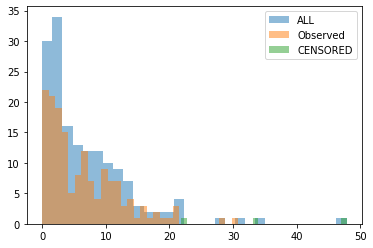

In [42]:
a = [cell.obs[1] for cell in lineage1.output_lineage if cell.state==0 and cell.obs[2]==1]
random_sampler = sp.bernoulli.rvs(p=0.5, size=len(a))
b = [cell.obs[1] for cell in lineage1.output_lineage if cell.state==0]
random_samplerb = sp.bernoulli.rvs(p=0.5, size=len(b))
f = [cell.obs[1] for cell in lineage1.output_lineage if cell.state==0 and cell.obs[2]==0]
bins=30
plt.hist(b, alpha=0.5, bins=bins, label='ALL')
plt.hist(a, alpha=0.5, bins=bins, label='Observed')
plt.hist(f, alpha=0.5, bins=bins, label='CENSORED')
plt.legend()


print(sum(random_sampler*a)/sum(random_sampler))
print(sum(random_samplerb*b)/sum(random_samplerb))
print(sum(f)/len(f))

[100.01757589524763, 98.81772931036011, 1.033468804329156, 66.08974824177736, 8.682085512269952, 30.166518685765197, 41.10448846848674, 17.993767300101197, 30.468515188681543, 11.727983454061008, 24.643960522646243, 44.87980192986639, 82.98271012624151, 76.17912760324378, 28.000542921327504, 56.57723939270022, 1.3358458584766855, 7.871811311859331, 73.15971423259595, 10.064872207953538, 95.24416381397023, 2.636995344824133, 23.17310786856856, 6.0553804804841045, 1.8897538525911977, 1.9064725958979754, 5.630972940473862, 58.48016445428851, 60.81430232995209, 40.43827419055438, 22.509776376023527, 4.720152499328405, 3.6441908884871683, 21.838962454524328, 3.030985014654959, 4.484448365925526, 8.687279151715702, 58.02437193009504, 4.114090535847526, 28.892972965959885, 44.125605183429684, 19.819996538685515, 52.06178958135665, 32.10665017666438, 34.07421615410448, 1.9885436561367704, 18.926362399727847, 74.81943817839253, 48.08460264992652, 31.784377300168714, 34.71030682315495, 24.938678

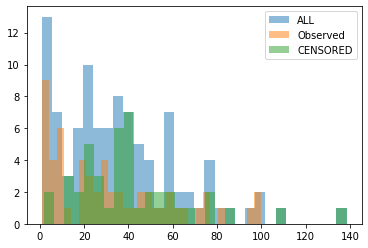

In [43]:
c = [cell.obs[1] for cell in lineage1.output_lineage if cell.state==1 and cell.obs[2]==1]
random_samplerc = sp.bernoulli.rvs(p=0.5, size=len(c))
d = [cell.obs[1] for cell in lineage1.output_lineage if cell.state==1]
random_samplerd = sp.bernoulli.rvs(p=0.5, size=len(d))
e = [cell.obs[1] for cell in lineage1.output_lineage if cell.state==1 and cell.obs[2]==0]
plt.hist(d, alpha=0.5, bins=bins, label='ALL')
plt.hist(c, alpha=0.5, bins=bins, label='Observed')
plt.hist(e, alpha=0.5, bins=bins, label='CENSORED')

plt.legend()

print(c)
print(random_samplerc*c)
print(sum(random_samplerc*c)/sum(random_samplerc))
print(sum(random_samplerd*d)/sum(random_samplerd))
print(sum(e)/len(e))

In [46]:
def funcer(exp_time):
    # pi: the initial probability vector
    pi = np.array([0.6, 0.4], dtype="float")
    # Recall that this means that the first cell in our lineage in generation 1 
    # has a 60% change of being state 0 and a 40% chance of being state 1.
    # The values of this vector have to add up to 1 because of the 
    # Law of Total Probability.

    # T: transition probability matrix
    T = np.array([[0.75, 0.25],
                  [0.25, 0.75]], dtype="float")

    # E: states are defined as StateDistribution objects

    # State 0 parameters "Resistant"
    bern_p0 = 1
    gamma_a0 = 7

    # State 1 parameters "Susceptible"
    bern_p1 = 1
    gamma_a1 = 49

    state_obj0 = StateDistribution(bern_p0, gamma_a0)
    state_obj1 = StateDistribution(bern_p1, gamma_a1)

    E = [state_obj0, state_obj1]

    lineage1 = LineageTree(pi, T, E, desired_num_cells=2**12 - 1, desired_experiment_time=exp_time, censor_condition=3)
    # These are the minimal arguments required to instantiate lineages
    a = [cell.obs[1] for cell in lineage1.output_lineage if cell.state==0 and cell.obs[2]==1]
    random_samplera = np.random.choice(a,size=len(a))
    b = [cell.obs[1] for cell in lineage1.output_lineage if cell.state==0]
    random_samplerb = np.random.choice(b,size=len(b))
    f = [cell.obs[1] for cell in lineage1.output_lineage if cell.state==0 and cell.obs[2]==0]
    c = [cell.obs[1] for cell in lineage1.output_lineage if cell.state==1 and cell.obs[2]==1]
    random_samplerc = np.random.choice(c,size=len(c))

    d = [cell.obs[1] for cell in lineage1.output_lineage if cell.state==1]
    random_samplerd = np.random.choice(d,size=len(d))

    e = [cell.obs[1] for cell in lineage1.output_lineage if cell.state==1 and cell.obs[2]==0]
    return sum(random_samplera)/len(random_samplera), (sum(random_samplerb)/len(random_samplerb)), (sum(random_samplerc)/len(random_samplerc)), (sum(random_samplerd)/len(random_samplerd)),

In [47]:
aa = []
bb = []
cc = []
dd = []
times = np.linspace(144,500, 100)
for i in times:
    a,b,c,d = funcer(i)
    aa.append(a)
    bb.append(b)
    cc.append(c)
    dd.append(d)
    

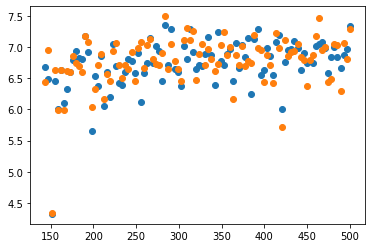

In [48]:
plt.scatter(times, aa)
plt.scatter(times, bb)

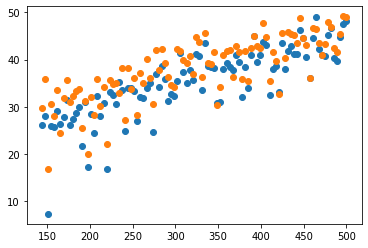

In [49]:
plt.scatter(times, cc)
plt.scatter(times, dd)

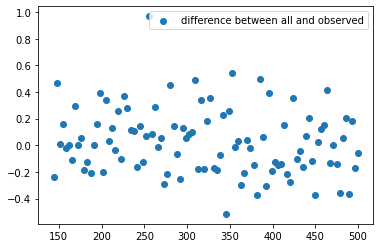

In [50]:
plt.scatter(times, [b-a for a,b in zip(aa,bb)], label='difference between all and observed')
plt.legend()

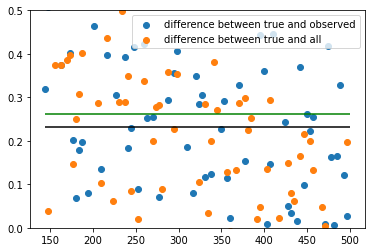

In [61]:
plt.scatter(times, [7-a for a in aa], label='difference between true and observed')
plt.scatter(times, [7-a for a in bb], label='difference between true and all')
plt.hlines(sum([7-a for a in aa])/len([7-a for a in aa]), xmin=min(times),xmax=max(times), color='g')
plt.hlines(sum([7-a for a in bb])/len([7-a for a in bb]), xmin=min(times),xmax=max(times))
plt.ylim(0,0.5)
plt.legend()

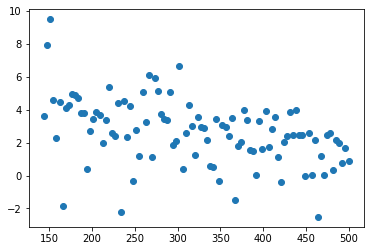

In [52]:
plt.scatter(times, [b-a for a,b in zip(cc,dd)])

100
100


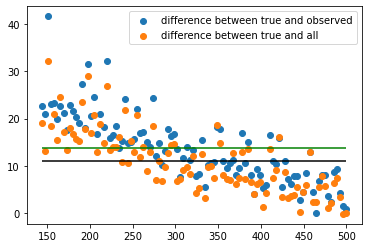

In [65]:
plt.scatter(times, [49-a for a in cc], label='difference between true and observed')
plt.scatter(times, [49-a for a in dd], label='difference between true and all')
plt.hlines(sum([49-a for a in cc])/len([49-a for a in cc]), xmin=min(times),xmax=max(times), color='g')
plt.hlines(sum([49-a for a in dd])/len([49-a for a in dd]), xmin=min(times),xmax=max(times))
plt.legend()

In [12]:
print(bern_obs)

[0 1 1 1 0]
